In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as sps
import pymc3 as pm
import matplotlib.pyplot as plt

%matplotlib inline

/home/pete/Projects/learn-pymc/venv-pymc/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
N = 5000
D = 40

pX = 0.1

sep = 1.0
w = np.concatenate((sep * np.ones(10), -sep * np.ones(10), np.zeros(20))).copy()
b = -2.0

X = stats.bernoulli.rvs(pX, size=(N,D))
pY = sps.expit(X.dot(w) + b)
y = stats.bernoulli.rvs(pY)

In [5]:
model = pm.Model()

with model:
    model_w = pm.MvNormal('model_w', mu=np.zeros(D), cov=np.identity(D), shape=(D))
    model_b = pm.Normal('model_b', mu=0.0, sd=1.0)
    model_p = pm.Deterministic('model_p', pm.math.sigmoid(pm.math.dot(X, model_w) + model_b))
    y_obs = pm.Bernoulli('y_obs', p=model_p, observed=y)

In [8]:
map_estimate = pm.find_MAP(model=model)

print(map_estimate['model_w'])
print(map_estimate['model_b'])

logp = -1,904.8, ||grad|| = 1.1164: 100%|██████████| 20/20 [00:00<00:00, 165.08it/s]  

[ 1.19050047  0.79948937  1.0554928   0.73766744  0.86394208  0.90888654
  0.91914278  0.91812135  1.04829825  0.7114194  -0.68913818 -1.10205082
 -0.86845714 -1.0141973  -0.966163   -0.98008994 -1.38995394 -0.81100563
 -1.13458196 -1.05258501 -0.21346739 -0.05226237 -0.04990084 -0.1994324
 -0.28819197  0.08352884  0.06553018 -0.13429332  0.11300283  0.0084427
  0.02789879  0.06446596 -0.2627386  -0.03358973 -0.1609411   0.13875365
 -0.01617377 -0.2871995  -0.03924824  0.00835339]
-1.802411489765608


In [6]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/pete/Projects/learn-pymc/venv-pymc/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (2 chains in 1 job)
NUTS: [model_b, model_w]
100%|██████████| 1000/1000 [00:34<00:00, 29.04it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
model_w__0,1.201808,0.115381,0.003476,0.958723,1.406646,1000.0,0.999710
model_w__1,0.804647,0.123645,0.003926,0.555521,1.036837,930.0,0.999515
model_w__2,1.063834,0.117197,0.003624,0.836457,1.305277,906.0,1.001444
model_w__3,0.738413,0.123134,0.003576,0.504367,0.965458,1000.0,0.999556
model_w__4,0.873756,0.120644,0.003333,0.623841,1.097719,1000.0,1.000049
model_w__5,0.913254,0.116398,0.002968,0.686049,1.137763,1000.0,0.999891
model_w__6,0.929153,0.129610,0.004210,0.654110,1.149408,1000.0,0.999653
model_w__7,0.927898,0.123369,0.003538,0.670415,1.159275,1000.0,0.999093
model_w__8,1.054293,0.114649,0.003438,0.829203,1.282594,1000.0,0.999367
model_w__9,0.705471,0.126517,0.003498,0.477718,0.962996,1000.0,0.999934


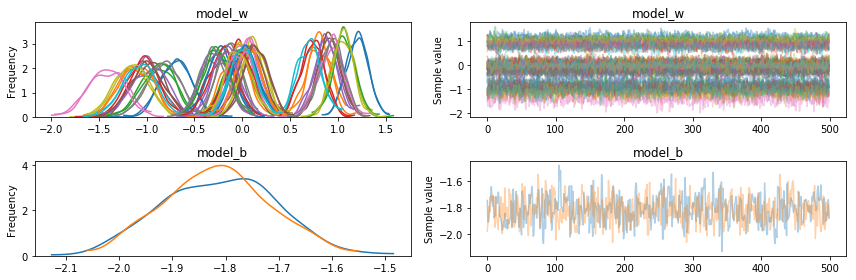

In [7]:
pm.traceplot(trace, varnames=['model_w', 'model_b'])
pm.summary(trace, varnames=['model_w', 'model_b'])